In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

plt.rcParams['figure.figsize'] = (11, 7)
plt.rcParams['font.size'] = 15
plt.rcParams['image.cmap'] = 'inferno'

In [2]:
def bifurcation_map(x0, r, n=200):
    x_arr = [x0]
    for _ in np.arange(n-1):
        x_1 = r * x_arr[-1] * (1 - x_arr[-1])
        x_arr.append(x_1)
    return x_arr

def bif_map_4_r(x0, r, k=0, n=200):
    assert isinstance(r, (list, tuple, set, np.ndarray))
    assert k <= n
    
    arr_dict = {}
    for r_i in r:
        x_ri = bifurcation_map(x0, r_i, n)
        arr_dict[r_i] = x_ri[-int(k):]
    return arr_dict

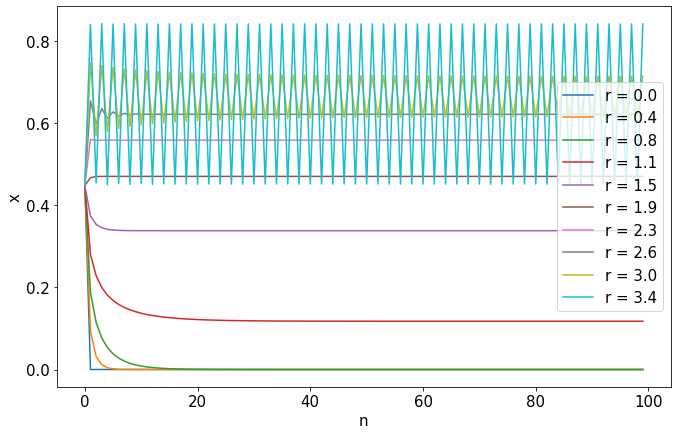

In [3]:
# Evolution of x
n = 100
arr_dict = bif_map_4_r(np.random.rand(), np.linspace(0, 3.4, 10), n=n)

for key, v in zip(arr_dict.keys(), arr_dict.values()):
    plt.plot(range(n), v, label=f'r = {round(key, 1)}')
    
plt.legend()
plt.xlabel('n')
plt.ylabel('x');
# plt.yscale('log')

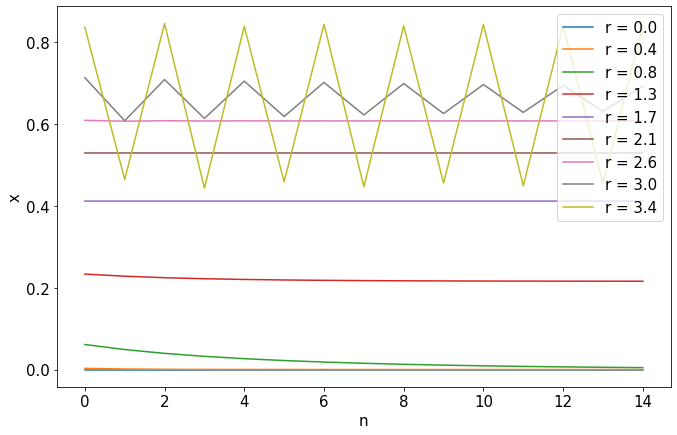

In [4]:
# n - totl number of iterations, take last k values
n = 20
k = 15
arr_dict = bif_map_4_r(np.random.rand(), np.linspace(0, 3.4, 9), k=k, n=n)

for key, v in zip(arr_dict.keys(), arr_dict.values()):
    plt.plot(range(int(k)), v, label=f'r = {round(key, 1)}')
    
plt.legend()
plt.xlabel('n')
plt.ylabel('x');
# plt.yscale('log')

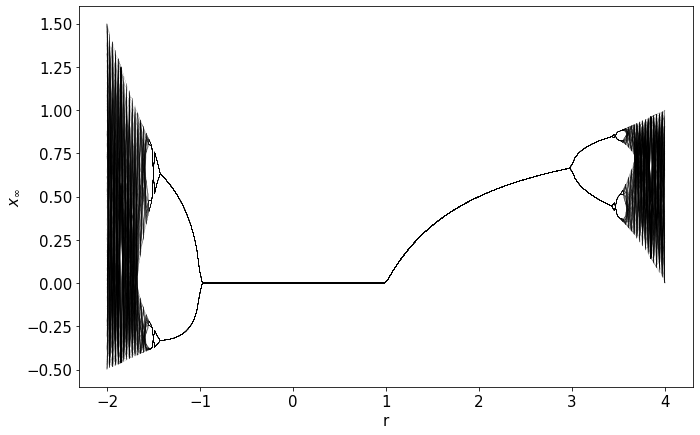

In [5]:
# Plot bifurcation map
n = 400
k = 200
arr_dict = bif_map_4_r(np.random.uniform(0, 1), r=np.linspace(-2, 4, 200), k=k, n=n)


plt.plot([[key] * k for key in arr_dict.keys()], [val for val in arr_dict.values()], 'k', lw=.1)
plt.xlabel('r')
plt.ylabel('$x_{\infty}$');